In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [5]:
(x_full, y_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_full = y_full.flatten()
y_test = y_test.flatten()

# Normalisasi
x_full = x_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split original train menjadi train (80%) + val (20%)
x_train, x_val, y_train, y_val = train_test_split(
    x_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

print("Shapes →",
      "train:",  x_train.shape, y_train.shape,
      "val:",    x_val.shape,   y_val.shape,
      "test:",   x_test.shape,  y_test.shape)

Shapes → train: (40000, 32, 32, 3) (40000,) val: (10000, 32, 32, 3) (10000,) test: (10000, 32, 32, 3) (10000,)



=== Training: 1 Conv2D ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 8s - 12ms/step - loss: 1.5096 - val_loss: 1.2819
Epoch 2/5
625/625 - 6s - 10ms/step - loss: 1.1902 - val_loss: 1.1688
Epoch 3/5
625/625 - 6s - 10ms/step - loss: 1.0687 - val_loss: 1.0888
Epoch 4/5
625/625 - 5s - 9ms/step - loss: 0.9737 - val_loss: 1.0800
Epoch 5/5
625/625 - 5s - 8ms/step - loss: 0.9029 - val_loss: 1.0384
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Macro F1 (test) = 0.6345


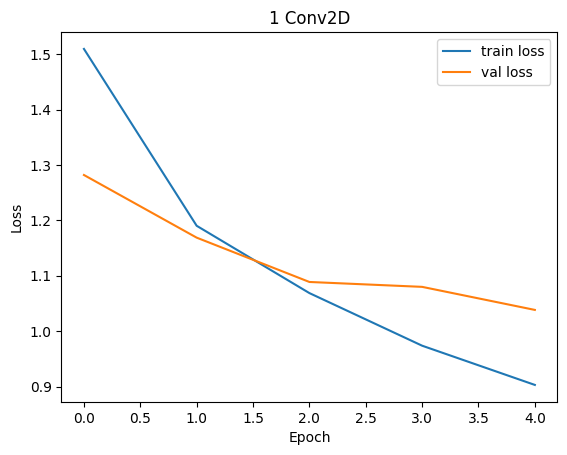

/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



=== Training: 2 Conv2D ===
Epoch 1/5
625/625 - 7s - 11ms/step - loss: 1.5068 - val_loss: 1.2799
Epoch 2/5
625/625 - 7s - 11ms/step - loss: 1.1711 - val_loss: 1.1087
Epoch 3/5
625/625 - 7s - 11ms/step - loss: 1.0356 - val_loss: 1.0280
Epoch 4/5
625/625 - 8s - 12ms/step - loss: 0.9392 - val_loss: 1.0009
Epoch 5/5
625/625 - 8s - 13ms/step - loss: 0.8648 - val_loss: 0.9574
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1 (test) = 0.6630


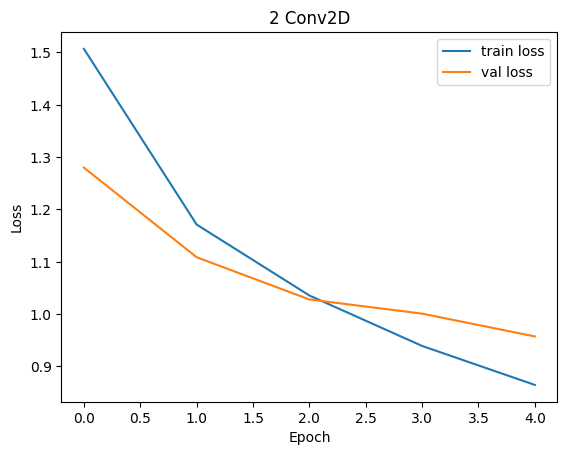


=== Training: 3 Conv2D ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 9s - 15ms/step - loss: 1.5980 - val_loss: 1.2840
Epoch 2/5
625/625 - 9s - 15ms/step - loss: 1.2176 - val_loss: 1.1851
Epoch 3/5
625/625 - 9s - 14ms/step - loss: 1.0641 - val_loss: 1.0128
Epoch 4/5
625/625 - 8s - 13ms/step - loss: 0.9640 - val_loss: 0.9659
Epoch 5/5
625/625 - 10s - 15ms/step - loss: 0.8893 - val_loss: 0.9251
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1 (test) = 0.6698


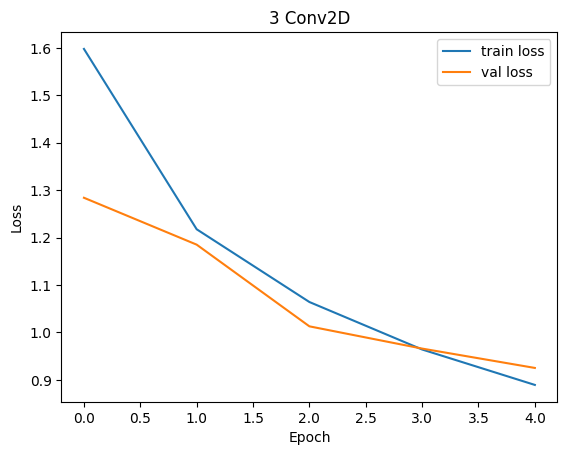

In [ ]:
results_conv = {}
for n_conv in [1, 2, 3]:
    model = models.Sequential([layers.InputLayer(input_shape=(32,32,3))])
    for _ in range(n_conv):
        model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    print(f"\n=== Training: {n_conv} Conv2D ===")
    h = model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=5, batch_size=64, verbose=2)
    model.save_weights(f'conv_{n_conv}layer.weights.h5')

    y_pred = np.argmax(model.predict(x_test), axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')
    results_conv[n_conv] = dict(history=h, f1=f1)
    print(f"Macro F1 (test) = {f1:.4f}")

    plt.figure()
    plt.plot(h.history['loss'],  label='train loss')
    plt.plot(h.history['val_loss'],label='val loss')
    plt.title(f'{n_conv} Conv2D'); plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()



=== Training: filters=f32 ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 9s - 15ms/step - loss: 1.6004 - val_loss: 1.3562
Epoch 2/5
625/625 - 9s - 14ms/step - loss: 1.2338 - val_loss: 1.1673
Epoch 3/5
625/625 - 9s - 14ms/step - loss: 1.0828 - val_loss: 1.0798
Epoch 4/5
625/625 - 8s - 12ms/step - loss: 0.9903 - val_loss: 1.0274
Epoch 5/5
625/625 - 9s - 15ms/step - loss: 0.9127 - val_loss: 0.9490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1 (test) = 0.6695


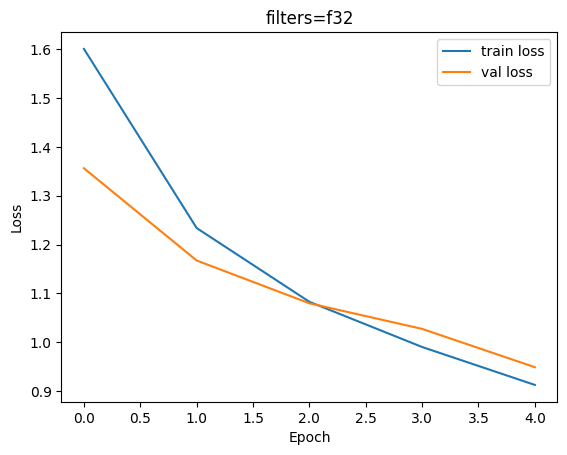


=== Training: filters=f64 ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 18s - 29ms/step - loss: 1.5295 - val_loss: 1.2399
Epoch 2/5
625/625 - 16s - 25ms/step - loss: 1.0844 - val_loss: 0.9824
Epoch 3/5
625/625 - 19s - 30ms/step - loss: 0.9156 - val_loss: 0.9532
Epoch 4/5
625/625 - 18s - 29ms/step - loss: 0.8096 - val_loss: 0.8621
Epoch 5/5
625/625 - 15s - 24ms/step - loss: 0.7258 - val_loss: 0.8363
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Macro F1 (test) = 0.7099


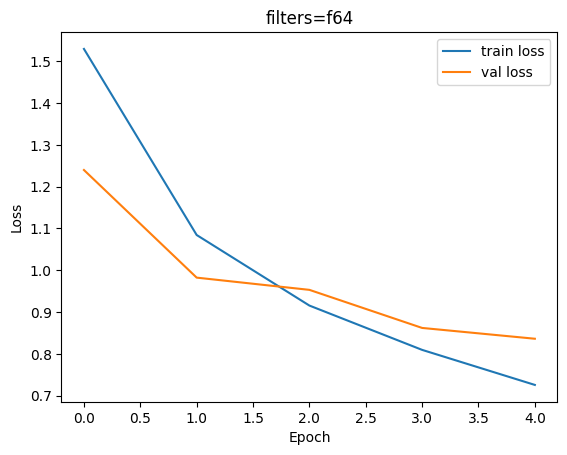


=== Training: filters=f128 ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 44s - 70ms/step - loss: 1.5056 - val_loss: 1.1533
Epoch 2/5
625/625 - 44s - 70ms/step - loss: 1.0363 - val_loss: 0.9674
Epoch 3/5
625/625 - 41s - 66ms/step - loss: 0.8536 - val_loss: 0.9081
Epoch 4/5
625/625 - 42s - 68ms/step - loss: 0.7289 - val_loss: 0.8485
Epoch 5/5
625/625 - 43s - 69ms/step - loss: 0.6348 - val_loss: 0.8165
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Macro F1 (test) = 0.7194


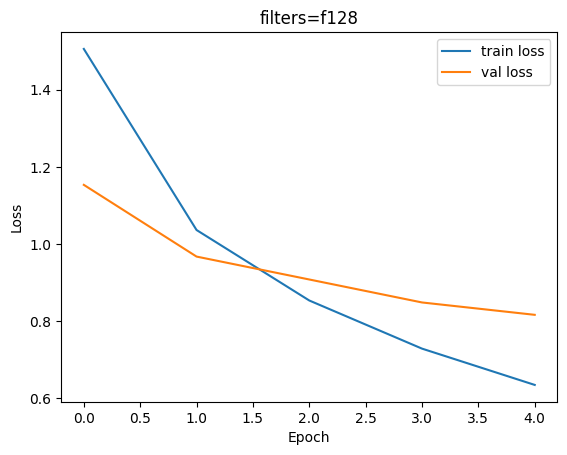

In [7]:
filter_configs = {
    'f32': [32,32,32],
    'f64': [64,64,64],
    'f128':[128,128,128],
}
results_filter = {}
for name, filters in filter_configs.items():
    model = models.Sequential([layers.InputLayer(input_shape=(32,32,3))])
    for f in filters:
        model.add(layers.Conv2D(f, (3,3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    print(f"\n=== Training: filters={name} ===")
    h = model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=5, batch_size=64, verbose=2)
    model.save_weights(f'filters_{name}.weights.h5')

    y_pred = np.argmax(model.predict(x_test), axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')
    results_filter[name] = dict(history=h, f1=f1)
    print(f"Macro F1 (test) = {f1:.4f}")

    plt.figure()
    plt.plot(h.history['loss'],  label='train loss')
    plt.plot(h.history['val_loss'],label='val loss')
    plt.title(f'filters={name}'); plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()



=== Training: kernel=k3 ((3, 3)) ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 9s - 15ms/step - loss: 1.5848 - val_loss: 1.2922
Epoch 2/5
625/625 - 8s - 13ms/step - loss: 1.2037 - val_loss: 1.2115
Epoch 3/5
625/625 - 8s - 13ms/step - loss: 1.0527 - val_loss: 1.0009
Epoch 4/5
625/625 - 9s - 14ms/step - loss: 0.9481 - val_loss: 1.0058
Epoch 5/5
625/625 - 9s - 14ms/step - loss: 0.8733 - val_loss: 0.9512
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Macro F1 (test) = 0.6713


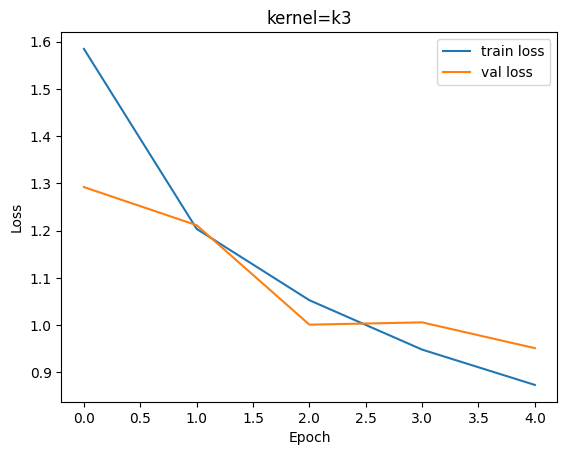


=== Training: kernel=k5 ((5, 5)) ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 17s - 27ms/step - loss: 1.5978 - val_loss: 1.3566
Epoch 2/5
625/625 - 17s - 27ms/step - loss: 1.2166 - val_loss: 1.1565
Epoch 3/5
625/625 - 15s - 25ms/step - loss: 1.0402 - val_loss: 1.0200
Epoch 4/5
625/625 - 15s - 24ms/step - loss: 0.9327 - val_loss: 0.9698
Epoch 5/5
625/625 - 14s - 23ms/step - loss: 0.8423 - val_loss: 0.9778
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Macro F1 (test) = 0.6498


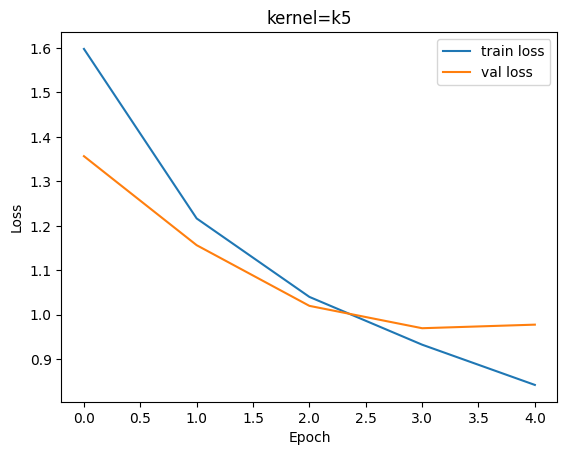


=== Training: kernel=k7 ((7, 7)) ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 25s - 41ms/step - loss: 1.6108 - val_loss: 1.3983
Epoch 2/5
625/625 - 26s - 42ms/step - loss: 1.2697 - val_loss: 1.2149
Epoch 3/5
625/625 - 27s - 42ms/step - loss: 1.0894 - val_loss: 1.1370
Epoch 4/5
625/625 - 30s - 47ms/step - loss: 0.9709 - val_loss: 1.0590
Epoch 5/5
625/625 - 24s - 39ms/step - loss: 0.8617 - val_loss: 0.9843
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Macro F1 (test) = 0.6456


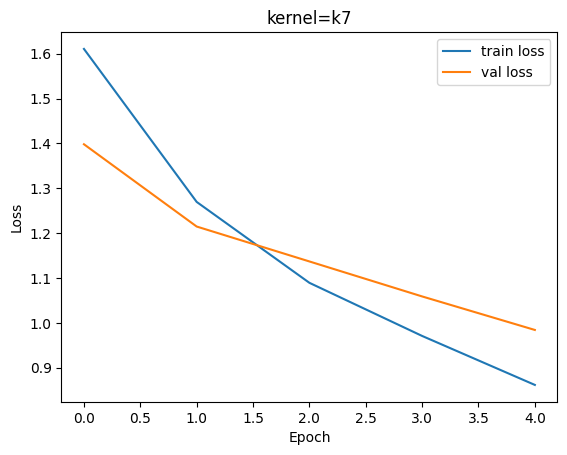

In [8]:
kernel_configs = {
    'k3': (3,3),
    'k5': (5,5),
    'k7': (7,7),
}
results_kernel = {}
for name, ks in kernel_configs.items():
    model = models.Sequential([layers.InputLayer(input_shape=(32,32,3))])
    for _ in range(3):
        model.add(layers.Conv2D(32, ks, activation='relu', padding='same'))
        model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    print(f"\n=== Training: kernel={name} ({ks}) ===")
    h = model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=5, batch_size=64, verbose=2)
    model.save_weights(f'kernel_{name}.weights.h5')

    y_pred = np.argmax(model.predict(x_test), axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')
    results_kernel[name] = dict(history=h, f1=f1)
    print(f"Macro F1 (test) = {f1:.4f}")

    plt.figure()
    plt.plot(h.history['loss'],  label='train loss')
    plt.plot(h.history['val_loss'],label='val loss')
    plt.title(f'kernel={name}'); plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



=== Training: pooling=max ===
Epoch 1/5
625/625 - 9s - 14ms/step - loss: 1.6088 - val_loss: 1.3160
Epoch 2/5
625/625 - 8s - 12ms/step - loss: 1.2448 - val_loss: 1.1411
Epoch 3/5
625/625 - 8s - 13ms/step - loss: 1.0902 - val_loss: 1.0984
Epoch 4/5
625/625 - 9s - 14ms/step - loss: 0.9835 - val_loss: 0.9722
Epoch 5/5
625/625 - 10s - 15ms/step - loss: 0.8977 - val_loss: 0.9613
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Macro F1 (test) = 0.6664


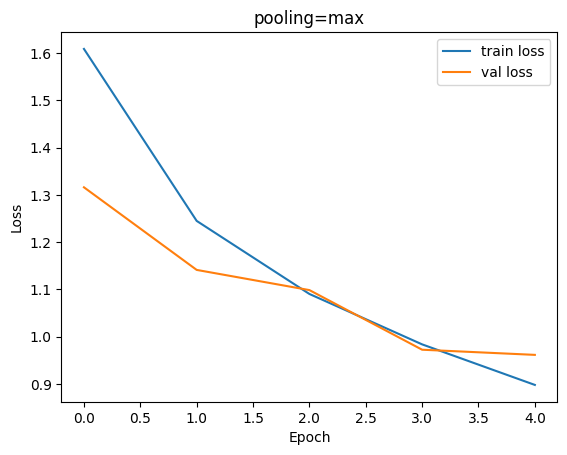


=== Training: pooling=average ===


/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
625/625 - 10s - 16ms/step - loss: 1.6905 - val_loss: 1.4713
Epoch 2/5
625/625 - 8s - 13ms/step - loss: 1.3602 - val_loss: 1.2905
Epoch 3/5
625/625 - 7s - 12ms/step - loss: 1.2213 - val_loss: 1.2250
Epoch 4/5
625/625 - 7s - 11ms/step - loss: 1.1188 - val_loss: 1.1259
Epoch 5/5
625/625 - 8s - 12ms/step - loss: 1.0464 - val_loss: 1.0671
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1 (test) = 0.6053


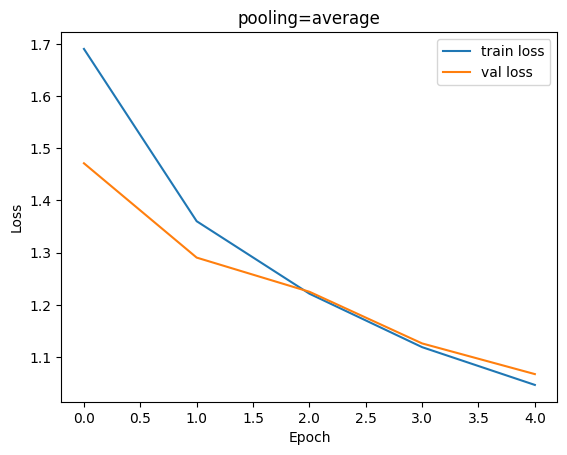

In [10]:
pool_types = ['max', 'average']
pool_size = (2, 2)
results_pool = {}
for p in pool_types:
    model = models.Sequential([layers.InputLayer(input_shape=(32,32,3))])
    for _ in range(3):
        model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
        if p=='max':
            model.add(layers.MaxPooling2D(pool_size))
        else:
            model.add(layers.AveragePooling2D(pool_size))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    print(f"\n=== Training: pooling={p} ===")
    h = model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=5, batch_size=64, verbose=2)
    model.save_weights(f'pool_{p}.weights.h5')

    y_pred = np.argmax(model.predict(x_test), axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')
    results_pool[p] = dict(history=h, f1=f1)
    print(f"Macro F1 (test) = {f1:.4f}")

    plt.figure()
    plt.plot(h.history['loss'],  label='train loss')
    plt.plot(h.history['val_loss'],label='val loss')
    plt.title(f'pooling={p}'); plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.show()


# Scratch vs Keras

In [65]:
import importlib
import classes.forward_cnn

importlib.reload(classes.forward_cnn)

from classes.forward_cnn import load_weights, CNN

In [66]:
weights_manual = load_weights('conv_2layer.weights.h5')
config_manual = [
    ('conv',    'conv2d'),
    ('pool',    'max'),
    ('conv',    'conv2d_1'),
    ('pool',    'max'),
    ('flatten', None),
    ('dense',   'dense',   'relu'),
    ('dense',   'dense_1', 'softmax'),
]
manual_cnn = CNN(weights_manual, config_manual)

In [67]:
keras_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax'),
])
keras_cnn.load_weights('conv_2layer.weights.h5')

/Users/derwinrustanly/Code/Python/7-IF3270-CNN-RNN-LSTM/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
y_manual = manual_cnn.predict(x_test)
y_keras  = np.argmax(keras_cnn.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
agreement = np.mean(y_manual == y_keras)
f1_manual = f1_score(y_test, y_manual, average='macro')
f1_keras  = f1_score(y_test, y_keras,  average='macro')

print(f'Agreement manual vs Keras: {agreement:.2%}')
print(f'Macro F1‐score manual: {f1_manual:.4f}')
print(f'Macro F1‐score Keras : {f1_keras:.4f}')

Agreement manual vs Keras: 100.00%
Macro F1‐score manual: 0.6630
Macro F1‐score Keras : 0.6630
